# Multi-series forecasting


In [univariate time series forecasting](https://joaquinamatrodrigo.github.io/skforecast/latest/quick-start/introduction-forecasting.html), a single time series is modeled as a linear or nonlinear combination of its lags. That is, the past values of the series are used to forecast its future. In multi-series forecasting, two or more time series are modeled together using a single model. Two strategies can be distinguished:

**No multivariate time series**

A single model is trained, but each time series remains independent of the others. In other words, the past values of one series are not used as predictors of other series. Why is it useful then to model everything together? Although the series do not depend on each other, they may follow the same intrinsic pattern regarding their past and future values. For example, in the same store, the sales of products A and B may not be related, but they follow the same dynamics, that of the store.

<p align="center"><img src="../img/forecaster_multi_series_train_matrix_diagram.png" style="width: 800px"></p>

In order to predict the next *n* steps, the same strategy of [recursive multi-step forecasting](https://joaquinamatrodrigo.github.io/skforecast/latest/quick-start/introduction-forecasting.html#multi-step-forecasting) is applied. The only difference is that, the series' name for which to estimate the predictions needs to be indicated.

<p align="center"><img src="../img/forecaster_multi_series_prediction_diagram.png" style="width: 800px"></p>

**Multivariate time series**

All series are modeled considering that each time series depends not only on its past values but also on the past values of the other series. The forecaster is expected not only to learn the information of each series separately but also to relate them. For example, the measurements made by all the sensors (flow, item_2, pressure...) installed on an industrial machine such as a compressor.

<p align="center"><img src="../img/forecaster_multivariate_train_matrix_diagram.png" style="width: 800px"></p>

For a more detailed example visit: [Multi-series-forecasting](https://www.cienciadedatos.net/documentos/py44-multi-series-forecasting-skforecast.html)

<script src="https://kit.fontawesome.com/d20edc211b.js" crossorigin="anonymous"></script>

<div class="admonition note" name="html-admonition" style="background: rgba(0,184,212,.1); padding-top: 0px; padding-bottom: 6px; border-radius: 8px; border-left: 8px solid #00b8d4;">

<p class="title">
    <i class="fa-circle-exclamation fa" style="font-size: 18px; color:#00b8d4;"></i>
    <b> &nbsp Note</b>
</p>
    
<code>ForecasterAutoregMultiSeries</code> class covers the use case of <b>No Multivariate time series</b>.

<code>ForecasterAutoregMultivariate</code> will be released in a future version of <b>Skforecast</b> - stay tuned!

</div>

## Libraries

In [50]:
# Libraries
# ==============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

from skforecast.ForecasterAutoregMultiSeries import ForecasterAutoregMultiSeries
from skforecast.model_selection_multiseries import backtesting_forecaster_multiseries
from skforecast.model_selection_multiseries import grid_search_forecaster_multiseries

## Data

In [ ]:
# Data download
# ==============================================================================
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/skforecast/master/' +
       'data/simulated_items_sales.csv')
data = pd.read_csv(url, sep=',')

# Data preparation (aggregation at daily level)
# ==============================================================================
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data = data.set_index('date')
data = data.asfreq('D')
data = data.sort_index()
data.head()

In [ ]:
# Split data into train-val-test
# ==============================================================================
end_train = '2014-07-15 23:59:00'
data_train = data.loc[:end_train, :].copy()
data_test  = data.loc[end_train:, :].copy()

print(f"Train dates : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Test dates  : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

Train dates : 2012-01-01 00:00:00 --- 2014-07-15 00:00:00  (n=927)
Test dates  : 2014-07-16 00:00:00 --- 2015-01-01 00:00:00  (n=170)


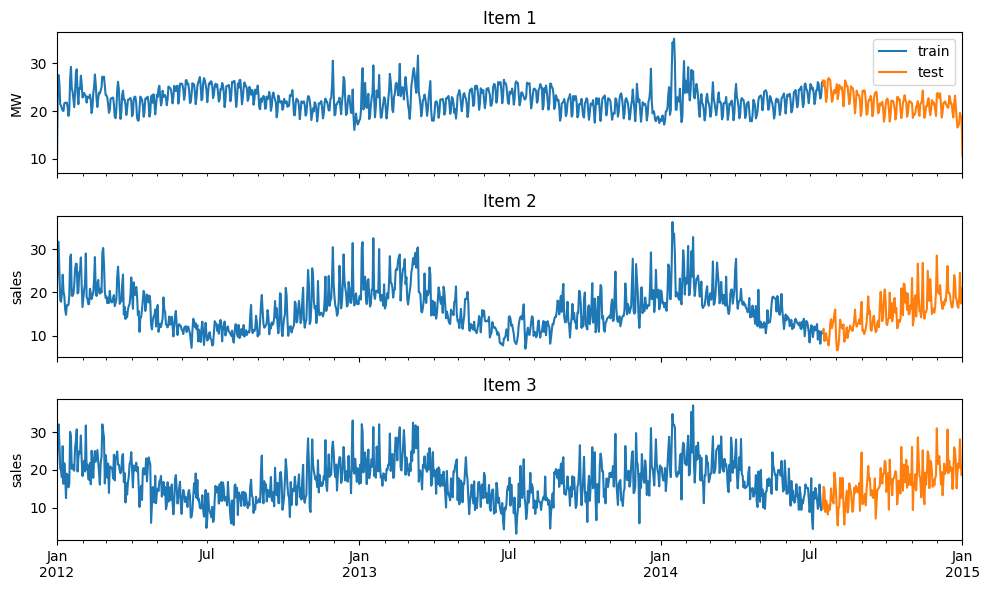

In [ ]:
# Plot time series
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 6), sharex=True)

data_train['item_1'].plot(label='train', ax=axes[0])
data_test['item_1'].plot(label='test', ax=axes[0])
axes[0].set_xlabel('')
axes[0].set_ylabel('MW')
axes[0].set_title('Item 1')
axes[0].legend()

data_train['item_2'].plot(label='train', ax=axes[1])
data_test['item_2'].plot(label='test', ax=axes[1])
axes[1].set_xlabel('')
axes[1].set_ylabel('sales')
axes[1].set_title('Item 2')

data_train['item_3'].plot(label='train', ax=axes[2])
data_test['item_3'].plot(label='test', ax=axes[2])
axes[2].set_xlabel('')
axes[2].set_ylabel('sales')
axes[2].set_title('Item 3')

fig.tight_layout()
plt.show();

## Train and predict ForecasterAutoregMultiSeries

In [ ]:
# Create and fit forecaster multi series
# ==============================================================================
forecaster = ForecasterAutoregMultiSeries(
                 regressor          = LinearRegression(),
                 lags               = 24,
                 transformer_series = None,
                 transformer_exog   = None
             )

forecaster.fit(series=data_train)
forecaster

ForecasterAutoregMultiSeries 
Regressor: LinearRegression() 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] 
Transformer for series: {'item_1': None, 'item_2': None, 'item_3': None} 
Transformer for exog: None 
Window size: 24 
Series levels: ['item_1', 'item_2', 'item_3'] 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('2012-01-01 00:00:00'), Timestamp('2014-07-15 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: D 
Regressor parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False} 
Creation date: 2022-10-13 16:46:31 
Last fit date: 2022-10-13 16:46:32 
Skforecast version: 0.5.1 
Python version: 3.9.13 

Two methods can be use to predict the next n steps: `predict()` or `predict_interval()`. The argument `level` is used to indicate for which series estimate predictions.

In [ ]:
# Predict and predict_interval
# ==============================================================================
steps = 24

# Predictions for item_1
predictions_item_1 = forecaster.predict(steps=steps, level='item_1')
display(predictions_item_1.head(3))

# Interval predictions for item_1
predictions_temp = forecaster.predict_interval(steps=steps, level='item_1')
display(predictions_temp.head(3))

2014-07-16    25.497655
2014-07-17    24.867333
2014-07-18    24.281557
Freq: D, Name: pred, dtype: float64

pred  lower_bound  upper_bound
2014-07-16  25.497655    23.220017    28.226023
2014-07-17  24.867333    22.141024    27.389717
2014-07-18  24.281557    21.688227    26.981138

## Backtesting Multi Series

As in the `predict` method, the `level` at which [backtesting](https://joaquinamatrodrigo.github.io/skforecast/latest/user_guides/backtesting.html) is performed must be indicated.

In [ ]:
# Backtesting Multi Series
# ==============================================================================
metric, predictions_item_1 = backtesting_forecaster_multiseries(
                                 forecaster         = forecaster,
                                 series             = data,
                                 level              = 'item_1',
                                 initial_train_size = len(data_train),
                                 fixed_train_size   = True,
                                 steps              = 24,
                                 metric             = 'mean_absolute_error',
                                 refit              = True,
                                 verbose            = False
                             )

print(f"Backtest error item_1: {metric}")
predictions_item_1.head(4)

Backtest error item_1: 1.3607708085816819


pred
2014-07-16  25.497655
2014-07-17  24.867333
2014-07-18  24.281557
2014-07-19  23.515885

## Hyperparameter tuning and lags selection Multi Series

Functions `grid_search_forecaster_multiseries` and `random_search_forecaster_multiseries` in the module `model_selection_multiseries` allow for lag and hyperparameter optimization. The optimization is performed in the same way as in the other forecasters, [see the user guide here](https://joaquinamatrodrigo.github.io/skforecast/latest/user_guides/hyperparameter-tuning-and-lags-selection.html), except for two arguments:

+ `levels`: level(s) at which the forecaster is optimized, for example:

    + If `levels = ['item_1', 'item_2']` (Same as `levels = None`), the function will search for the lags and hyperparameters that minimize the average error of the predictions of both time series. The resulting metric will be a weighted average of the optimization of both levels. 

    + If `levels = 'item_1'` (Same as `levels = ['item_1']`), the function will search for the lags and hyperparameters that minimize the error of the `item_1` predictions.

+ `levels_weights`: weights given to each level during optimization, for example: 

    + If `levels = ['item_1', 'item_2']` and `levels_weights = {'item_1': 0.5, 'item_2': 0.5}` (Same as `levels_weights = None`), both time series will have the same weight in the calculation of the resulting metric.

The following example shows how to use `grid_search_forecaster_multiseries` to find the best lags and model hyperparameters for both time series:

In [ ]:
# Create and fit forecaster multi series
# ==============================================================================
forecaster = ForecasterAutoregMultiSeries(
                 regressor          = Ridge(random_state=123),
                 lags               = 24,
                 transformer_series = StandardScaler(),
                 transformer_exog   = None
             )

In [ ]:
# Grid search Multi Series
# ==============================================================================
lags_grid = [24, 48]
param_grid = {'alpha': [0.01, 0.1, 1]}

levels = ['item_1', 'item_2', 'item_3']

results = grid_search_forecaster_multiseries(
              forecaster          = forecaster,
              series              = data,
              lags_grid           = lags_grid,
              param_grid          = param_grid,
              steps               = 24,
              metric              = 'mean_absolute_error',
              initial_train_size  = len(data_train),
              fixed_train_size    = True,
              levels              = levels,
              exog                = None,
              refit               = True,
              return_best         = False,
              verbose             = False
          )

results

6 models compared for 3 level(s). Number of iterations: 18.
Level weights for metric evaluation: {'item_1': 0.3333333333333333, 'item_2': 0.3333333333333333, 'item_3': 0.3333333333333333}


loop lags_grid: 100%|███████████████████████████████████████| 2/2 [00:08<00:00,  4.04s/it]


levels  \
5  [item_1, item_2, item_3]   
4  [item_1, item_2, item_3]   
3  [item_1, item_2, item_3]   
2  [item_1, item_2, item_3]   
1  [item_1, item_2, item_3]   
0  [item_1, item_2, item_3]   

                                                lags           params  \
5  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...     {'alpha': 1}   
4  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   {'alpha': 0.1}   
3  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  {'alpha': 0.01}   
2  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...     {'alpha': 1}   
1  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   {'alpha': 0.1}   
0  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  {'alpha': 0.01}   

   mean_absolute_error  alpha  
5             2.207648   1.00  
4             2.207700   0.10  
3             2.207706   0.01  
2             2.335039   1.00  
1             2.335149   0.10  
0             2.335161   0.01

<script src="https://kit.fontawesome.com/d20edc211b.js" crossorigin="anonymous"></script>

<div class="admonition note" name="html-admonition" style="background: rgba(255,145,0,.1); padding-top: 0px; padding-bottom: 6px; border-radius: 8px; border-left: 8px solid #ff9100;">

<p class="title">
    <i class="fa-triangle-exclamation fa" style="font-size: 18px; color:#ff9100;"></i>
    <b> &nbsp Warning</b>
</p>

Use <b>multiple metrics</b> in the hyperparameter tuning and <code>bayesian_search_forecaster_multiseries</code> will be released in a future version of <b>Skforecast</b>
    
Stay tuned!

</div>

In [ ]:
%%html
<style>
.jupyter-wrapper .jp-CodeCell .jp-Cell-inputWrapper .jp-InputPrompt {display: none;}
</style>